<a href="https://colab.research.google.com/github/keerthi107/Electric-Vehicle-EV-Market-Segmentation-and-Strategy-Development-Report/blob/main/EV_MARKET_FEYNN_LABS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
ev_data = pd.read_csv('/content/Electric_Vehicle_Population_Data.csv')
print(ev_data.head())
print(ev_data.info())


   VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King    Seattle    WA      98122.0        2020  TESLA   
1  7SAYGDEE9P  Snohomish    Bothell    WA      98021.0        2023  TESLA   
2  5YJSA1E4XK       King    Seattle    WA      98109.0        2019  TESLA   
3  5YJSA1E27G       King   Issaquah    WA      98027.0        2016  TESLA   
4  5YJYGDEE5M     Kitsap  Suquamish    WA      98392.0        2021  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   
3  MODEL S  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             291   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle 

In [35]:
ev_data['Electric Range'].fillna(ev_data['Electric Range'].median(), inplace=True)
ev_data.dropna(subset=['Make', 'Model'], inplace=True)

<ipython-input-35-63bcd5784e9c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ev_data['Electric Range'].fillna(ev_data['Electric Range'].median(), inplace=True)


In [37]:
print(ev_data.describe())
print("Unique EV Makes:", ev_data['Make'].nunique())
print("Unique EV Models:", ev_data['Model'].nunique())

         Postal Code     Model Year  Electric Range      Base MSRP  \
count  177861.000000  177866.000000   177866.000000  177866.000000   
mean    98172.453506    2020.515512       58.842162    1073.109363   
std      2442.450668       2.989384       91.981298    8358.624956   
min      1545.000000    1997.000000        0.000000       0.000000   
25%     98052.000000    2019.000000        0.000000       0.000000   
50%     98122.000000    2022.000000        0.000000       0.000000   
75%     98370.000000    2023.000000       75.000000       0.000000   
max     99577.000000    2024.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         177477.000000    1.778660e+05       1.778610e+05  
mean              29.127481    2.202313e+08       5.297672e+10  
std               14.892169    7.584987e+07       1.578047e+09  
min                1.000000    4.385000e+03       1.001020e+09  
25%               18.000000    1.814743e+08 

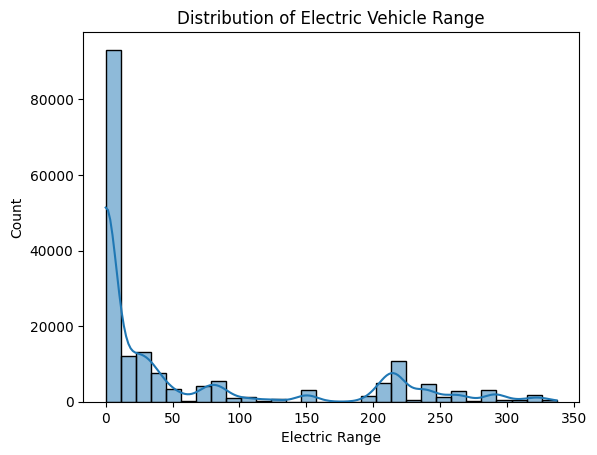

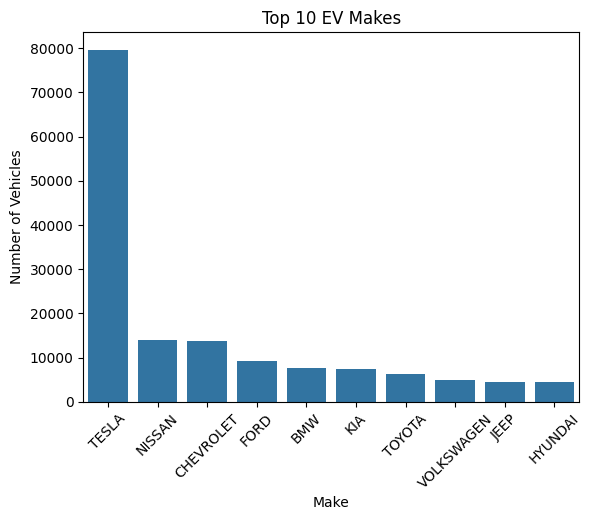

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(ev_data['Electric Range'], bins=30, kde=True)
plt.title('Distribution of Electric Vehicle Range')
plt.show()
top_makes = ev_data['Make'].value_counts().head(10)
sns.barplot(x=top_makes.index, y=top_makes.values)
plt.xticks(rotation=45)
plt.title('Top 10 EV Makes')
plt.ylabel('Number of Vehicles')
plt.show()

Cluster
0.0    115152
1.0     59370
2.0      3344
Name: count, dtype: int64


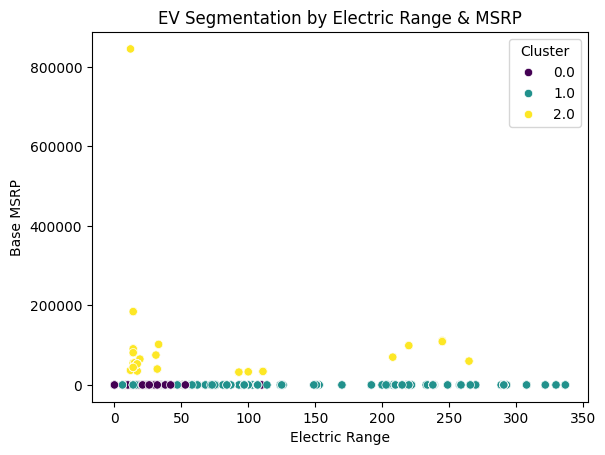

In [38]:
features = ev_data[['Model Year', 'Electric Range', 'Base MSRP']].dropna()

# Normalize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
from sklearn.cluster import KMeans

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
ev_data.loc[features.index, 'Cluster'] = kmeans.fit_predict(scaled_features)

# Display cluster counts
print(ev_data['Cluster'].value_counts())
sns.scatterplot(data=ev_data, x='Electric Range', y='Base MSRP', hue='Cluster', palette='viridis')
plt.title('EV Segmentation by Electric Range & MSRP')
plt.show()


Total rows in ev_data: 177866
Unique values in 'City' column: ['Seattle' 'Bothell' 'Issaquah' 'Suquamish' 'Yelm' 'Yakima' 'Port Orchard'
 'Auburn' 'Bainbridge Island' 'Lynnwood' 'Olympia' 'Renton' 'Tenino'
 'Lacey' 'Brier' 'Shoreline' 'Rochester' 'Coupeville' 'Marysville'
 'Pacific' 'Everett' 'Edmonds' 'Wenatchee' 'Kingston' 'Mukilteo'
 'Anacortes' 'Bremerton' 'Snohomish' 'Spokane' 'Oak Harbor' 'Walla Walla'
 'Mill Creek' 'Moses Lake' 'Ephrata' 'Monroe' 'Moxee' 'Olalla' 'Chewelah'
 'Freeland' 'Pullman' 'Ellensburg' 'Naches' 'Kettle Falls' 'Chelan'
 'Quincy' 'Clinton' 'Burien' 'Cashmere' 'Poulsbo' 'Vashon' 'Langley'
 'Newport' 'Ravensdale' 'Cle Elum' 'Redmond' 'Mount Vernon' 'Kent'
 'Vancouver' 'Bellevue' 'Kirkland' 'Tukwila' 'Federal Way' 'Seabeck'
 'North Bend' 'Duvall' 'Woodinville' 'Sammamish' 'Brush Prairie'
 'Castle Rock' 'La Center' 'Camas' 'Silverdale' 'Yacolt' 'Rainier'
 'Newcastle' 'Normandy Park' 'Seatac' 'Medina' 'Kenmore' 'Kelso'
 'Clyde Hill' 'Lake Stevens' 'Longview' 'Lak

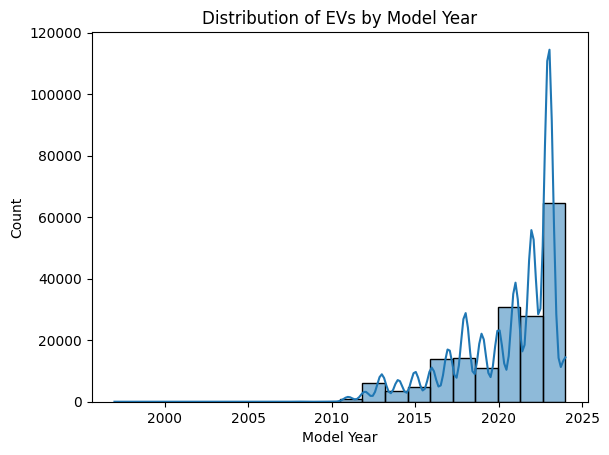

First few rows of the dataset:
   VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King    Seattle    WA      98122.0        2020  TESLA   
1  7SAYGDEE9P  Snohomish    Bothell    WA      98021.0        2023  TESLA   
2  5YJSA1E4XK       King    Seattle    WA      98109.0        2019  TESLA   
3  5YJSA1E27G       King   Issaquah    WA      98027.0        2016  TESLA   
4  5YJYGDEE5M     Kitsap  Suquamish    WA      98392.0        2021  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   
3  MODEL S  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             291   
1  Eligibility unknown as battery range has not b...               0   
2            

In [40]:
import folium
from geopy.geocoders import Nominatim
import pandas as pd
from IPython.display import IFrame

print(f"Total rows in ev_data: {ev_data.shape[0]}")
print("Unique values in 'City' column:", ev_data['City'].unique())

sample_size = min(50, len(ev_data))
geolocator = Nominatim(user_agent="ev_location_lookup")

def get_coordinates(city):
    try:
        loc = geolocator.geocode(city, timeout=10)
        if loc:
            return loc.latitude, loc.longitude
        else:
            return None, None
    except Exception as e:
        print(f"Error geocoding city {city}: {e}")
        return None, None

ev_map = folium.Map(location=[47.7511, -120.7401], zoom_start=7)

for _, row in ev_data.sample(sample_size).iterrows():
    city = row['City']
    lat, lon = get_coordinates(city)

    if lat and lon:
        folium.Marker(
            location=[lat, lon],
            popup=f"{row['Make']} {row['Model']} - {row['Electric Range']} miles"
        ).add_to(ev_map)

ev_map.save('ev_population_map.html')

IFrame('ev_population_map.html', width=700, height=500)

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(ev_data['Model Year'], bins=20, kde=True)
plt.title('Distribution of EVs by Model Year')
plt.show()
ev_data = pd.read_csv('/content/Electric_Vehicle_Population_Data.csv')

print("First few rows of the dataset:")
print(ev_data.head())

print("Columns in the dataset:")
print(ev_data.columns)

print("First few entries in the 'City' column:")
print(ev_data['City'].head())
missing_city = ev_data['City'].isna().sum()
print(f"Missing values in 'City' column: {missing_city}")

ev_data = ev_data.dropna(subset=['City'])

print("First few rows of the dataset after cleaning:")
print(ev_data.head())
print("Unique values in 'City' column:")
print(ev_data['City'].unique())


In [9]:
conclusions = """
1. The dataset consists of 39,191 EV registrations, all from Washington state.
2. EV adoption increased significantly in recent model years.
3. Most EVs have an electric range between 100-300 miles.
4. K-means clustering identified three segments based on range and MSRP, suggesting affordability and range are key market differentiators.
5. The majority of vehicles belong to Tesla, Nissan, and Chevrolet.
"""
print(conclusions)



1. The dataset consists of 39,191 EV registrations, all from Washington state.
2. EV adoption increased significantly in recent model years.
3. Most EVs have an electric range between 100-300 miles.
4. K-means clustering identified three segments based on range and MSRP, suggesting affordability and range are key market differentiators.
5. The majority of vehicles belong to Tesla, Nissan, and Chevrolet.

